Get the data

In [1]:
import numpy as np
import pandas as pd
data1 = pd.read_csv('D:/ProgrammingBook/AndrewNg/ex2data1.txt', sep=',', header=None, 
                    names = ["Grade1", "Grade2", "Admission"])
data1.head()

,Grade1,Grade2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Visualize the data

In [6]:
non_admitted = data1[data1["Admission"]==0]
non_admitted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 92
Data columns (total 3 columns):
Grade1       40 non-null float64
Grade2       40 non-null float64
Admission    40 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [7]:
admitted = data1[data1["Admission"]==1]
admitted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 3 to 99
Data columns (total 3 columns):
Grade1       60 non-null float64
Grade2       60 non-null float64
Admission    60 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


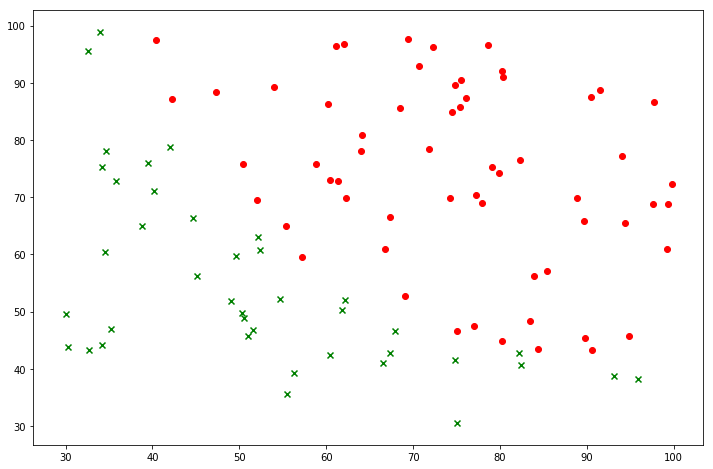

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x = admitted["Grade1"], y = admitted["Grade2"], c = 'r', marker = 'o')
ax.scatter(x = non_admitted["Grade1"], y = non_admitted["Grade2"], c = 'g', marker = 'x')
plt.show()

Set the sigmoid function

In [18]:
def SigmoidFunc(x):
    temp = 1+np.exp(-x)
    res = 1/temp
    return res
a = np.array([-1,0,1])
a = np.expand_dims(a,axis = 1)
print(a.shape)
SigmoidFunc(a)

(3, 1)


array([[0.26894142],
       [0.5       ],
       [0.73105858]])

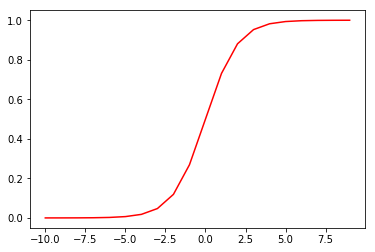

In [31]:
example_x = np.arange(-10,10, step = 1)
example_y = SigmoidFunc(example_x)
plt.plot(example_x, example_y, c='r')
plt.show()

设置损失函数

In [109]:
def costfunc(theta, x, y):
    theta = np.expand_dims(theta, axis = 1)
    product = np.dot(x, theta)
    hypo = SigmoidFunc(product)
    log_hypo_1 = np.log(hypo)
    log_hypo_2 = np.log(1-hypo)
    sum_1 = (-y)*log_hypo_1
    sum_2 = -(1-y)*log_hypo_2
    return np.sum(sum_1+sum_2)/len(y)

In [104]:
theta = np.zeros(3)
x = data1.iloc[:,0:2].values
y = data1.iloc[:,2].values
y = np.expand_dims(y, axis = 1)

In [105]:
theta

array([0., 0., 0.])

In [106]:
a = np.ones((len(x),1))
x = np.c_[a,x]
x.shape

(100, 3)

In [107]:
y.shape

(100, 1)

In [110]:
costfunc(theta, x, y)

0.6931471805599453

Get the gradient

In [113]:
def get_gradient(theta, x ,y):
    m = len(x)
    n = len(theta)
    gradient = [0,0,0]
    theta = np.expand_dims(theta, axis = 1)
    for i in range(0,n):
        product = np.dot(x, theta)
        temp = np.expand_dims(x[:,i], axis = 1)
        gradient[i] = np.sum((SigmoidFunc(product)-y)*temp)/m
    return gradient
grad = get_gradient(theta, x, y)
grad = np.array(grad)
grad

array([ -0.1       , -12.00921659, -11.26284221])

以上是梯度下降法在参数为0时候的梯度结果，接下来用Scipy的truncated newton（TNC）来进行计算，以刚才的梯度结果为初始值代入。

In [114]:
import scipy.optimize as opt
res = opt.fmin_tnc(func = costfunc, x0 = theta, fprime=get_gradient, args = (x,y))
res
#这里的参数有明确要求，以后为保险起见，numpy array的形式转换在自写函数里进行。毕竟我们是在调用别人的库，应以别人的标准为准。

(array([-25.16131861,   0.20623159,   0.20147149]), 36, 0)

In [116]:
T=res[0]
costfunc(T, x, y)

0.20349770158947467

In [117]:
def predict(theta, x):
    theta = np.expand_dims(theta, axis = 1)
    product = np.dot(x, theta)
    probability = SigmoidFunc(product)
    return (1 if i>=0.5 else 0 for i in probability)

In [124]:
predictions = predict(T, x)
result = [1 if((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions, y)]
result = np.array(result)
correct = np.sum(result==1)
accuracy = correct/len(result)
print("Accuracy:",accuracy)

Accuracy: 0.89


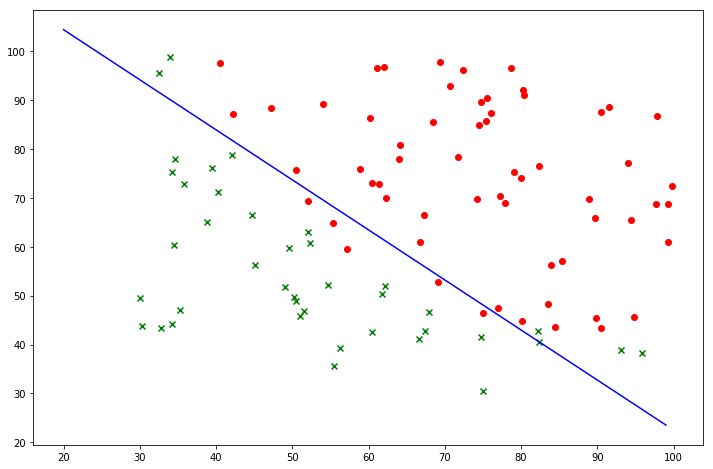

In [128]:
exam1 = np.arange(20,100, step = 1)
exam2 = -(T[0]/T[2]+T[1]/T[2]*exam1)
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x = admitted["Grade1"], y = admitted["Grade2"], c = 'r', marker = 'o')
ax.scatter(x = non_admitted["Grade1"], y = non_admitted["Grade2"], c = 'g', marker = 'x')
ax.plot(exam1, exam2, c='b')
plt.show()